
# Project: Investigate a Dataset - [Gapminder World Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Gapminder is an independent educational non-proﬁt-making organization, that aims to ﬁght misconceptions about different global trends through extensive data analysis. In particular, the Gapminder World Dataset is a large collection of files containing data about people from different countries collected over a number of years, that can be used to study different patterns related to population growth, health, education, employment rates, etc. 

In this project, a subset of the Gapminder World Dataset is investigated to study the education levels and unemployment rates of people across the two genders, belonging to different age groups and living in different countries. The data used in this project is obtained from GitHub through: https://github.com/open-numbers/ddf--gapminder--systema_globalis, and is accessible free-of-charge by GAPMINDER.ORG under the Creative Commons Attribution 4.0 International license.

### Question(s) for Analysis
The data analysis conducted in this project aims to answer the following questions: 
1. What is the relationship between gender and the mean years spent at school across different regions?
2. What is the relationship between age and the unemployment rates in different regions?
3. What is the relationship between the mean years spent at school and the unemployment rates across different regions for people aged 25-54?
4. How have unemployment rates varied over time in countries from different regions? Are unemployment rates growing in certain regions than others? 
5. What is the relationship between mean school years and youth literacy rates per region?

In [1]:
#Package import statements 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

Data in the Gapminder World Dataset is provided in the form of a large collection of CSV files in DDFcsv format. DDF is the data model used by Gapminder Foundation to structure their data, with a certain file naming convention that follows the structure of the data file. A subset of these files is extracted to be used for this project and are included in the associated .zip package. These files are categorized for this project as follows:
1. Key Files:
- ddf--entities--geo--country.csv

2. Data Files:
2. a. Female Unmployment Data
- ddf--datapoints--females_aged_15_24_unemployment_rate_percent--by--geo--time.csv
- ddf--datapoints--females_aged_25_54_unemployment_rate_percent--by--geo--time.csv
- ddf--datapoints--females_aged_55_64_unemployment_rate_percent--by--geo--time.csv
- ddf--datapoints--females_aged_65plus_unemployment_rate_percent--by--geo--time.csv

2. b. Male Unemployment Data
- ddf--datapoints--males_aged_15_24_employment_rate_percent--by--geo--time.csv
- ddf--datapoints--males_aged_15_24_unemployment_rate_percent--by--geo--time.csv
- ddf--datapoints--males_aged_25_54_unemployment_rate_percent--by--geo--time.csv
- ddf--datapoints--males_aged_55_64_unemployment_rate_percent--by--geo--time.csv
- ddf--datapoints--males_aged_65plus_unemployment_rate_percent--by--geo--time.csv

2. c. Female Mean School Years
- ddf--datapoints--mean_years_in_school_women_15_to_24_years--by--geo--time.csv
- ddf--datapoints--mean_years_in_school_women_25_to_34_years--by--geo--time.csv
- ddf--datapoints--mean_years_in_school_women_35_to_44_years--by--geo--time.csv
- ddf--datapoints--mean_years_in_school_women_45_to_54_years--by--geo--time.csv
- ddf--datapoints--mean_years_in_school_women_55_to_64_years--by--geo--time.csv
- ddf--datapoints--mean_years_in_school_women_65_plus_years--by--geo--time.csv

2. d. Male Mean School Years
- ddf--datapoints--mean_years_in_school_men_15_to_24_years--by--geo--time.csv
- ddf--datapoints--mean_years_in_school_men_25_to_34_years--by--geo--time.csv
- ddf--datapoints--mean_years_in_school_men_35_to_44_years--by--geo--time.csv
- ddf--datapoints--mean_years_in_school_men_45_to_54_years--by--geo--time.csv
- ddf--datapoints--mean_years_in_school_men_55_to_64_years--by--geo--time.csv
- ddf--datapoints--mean_years_in_school_men_65_plus_years--by--geo--time.csv

2. e. Male/Female Literacy Rates
- ddf--datapoints--literacy_rate_youth_female_percent_of_females_ages_15_24--by--geo--time.csv
- ddf--datapoints--literacy_rate_youth_male_percent_of_males_ages_15_24--by--geo--time.csv


### Data Wrangling Process
The files in each of the above categories are re-organized and merged to fascilitate the analysis and be able to answer the research questions. This is done using the following steps. 

#### Step 1:
From the ddf--entities--geo--country.csv, a Dataframe with country codes, names, regions and income levels is extracted. 

In [2]:
df_country = pd.read_csv('ddf--entities--geo--country.csv')
df_country.head(2)

,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,...,main_religion_2008,name,un_sdg_ldc,un_sdg_region,un_state,unhcr_region,unicef_region,unicode_region_subtag,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,Abkhazia,NaN,NaN,False,NaN,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,...,christian,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,NaN,AW,americas,america


In [3]:
df_country.shape

(273, 22)

In [4]:
# Confirming no duplicate entries for country. 
df_country['country'].nunique()

273

In [5]:
# Keeping only the needed columns in the Dataframe.
df_country = df_country[['country','name','world_6region']]
df_country.head(2)

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america


In [6]:
# Saving the country list into a new .csv file
df_country.to_csv('country_region.csv', index=False)

#### Step 2: 
Merging unemployment data files (2.a. and 2.b.) into a single Dataframe. 

In [7]:
# Females, Age group: 15-24
df_unemp_f_15_24 = pd.read_csv('ddf--datapoints--females_aged_15_24_unemployment_rate_percent--by--geo--time.csv')
df_unemp_f_15_24.head(2)

,geo,time,females_aged_15_24_unemployment_rate_percent
0,abw,2007,22.9000
1,afg,2008,3.9516


In [8]:
df_unemp_f_15_24.shape

(2266, 3)

In [9]:
# Adding columns for Age group and Gender
df_unemp_f_15_24['age_group']= '15-24'
df_unemp_f_15_24['gender']= 'female'
df_unemp_f_15_24.rename(columns={'females_aged_15_24_unemployment_rate_percent':'unemployment_percent'}, inplace=True)

In [10]:
# Restructuring the columns
df_unemp_f_15_24 = df_unemp_f_15_24[['time','geo','age_group','gender','unemployment_percent']]
df_unemp_f_15_24.head(2)

,time,geo,age_group,gender,unemployment_percent
0,2007,abw,15-24,female,22.9000
1,2008,afg,15-24,female,3.9516


In [11]:
#confirm no duplicates
sum(df_unemp_f_15_24.duplicated())

0

In [12]:
# Females, Age group: 25-54
df_unemp_f_25_54 = pd.read_csv('ddf--datapoints--females_aged_25_54_unemployment_rate_percent--by--geo--time.csv')
df_unemp_f_25_54.shape

(2250, 3)

In [13]:
df_unemp_f_25_54['age_group']= '25-54'
df_unemp_f_25_54['gender']= 'female'
df_unemp_f_25_54.rename(columns={'females_aged_25_54_unemployment_rate_percent':'unemployment_percent'}, inplace=True)

In [14]:
df_unemp_f_25_54 = df_unemp_f_25_54[['time','geo','age_group','gender','unemployment_percent']]
df_unemp_f_25_54.head(2)

,time,geo,age_group,gender,unemployment_percent
0,2007,abw,25-54,female,4.9600
1,2008,afg,25-54,female,1.4183


In [15]:
# Females, Age group: 55-64
df_unemp_f_55_64 = pd.read_csv('ddf--datapoints--females_aged_55_64_unemployment_rate_percent--by--geo--time.csv')
df_unemp_f_55_64.shape

(2078, 3)

In [16]:
df_unemp_f_55_64['age_group']= '55-64'
df_unemp_f_55_64['gender']= 'female'
df_unemp_f_55_64.rename(columns={'females_aged_55_64_unemployment_rate_percent':'unemployment_percent'}, inplace=True)

In [17]:
df_unemp_f_55_64 = df_unemp_f_55_64[['time','geo','age_group','gender','unemployment_percent']]
df_unemp_f_55_64.head(2)

,time,geo,age_group,gender,unemployment_percent
0,2007,abw,55-64,female,1.6700
1,2008,afg,55-64,female,1.8512


In [18]:
# Females, Age group: 65+
df_unemp_f_65 = pd.read_csv('ddf--datapoints--females_aged_65plus_unemployment_rate_percent--by--geo--time.csv')
df_unemp_f_65.shape

(1279, 3)

In [19]:
df_unemp_f_65['age_group']= '65+'
df_unemp_f_65['gender']= 'female'
df_unemp_f_65.rename(columns={'females_aged_65plus_unemployment_rate_percent':'unemployment_percent'}, inplace=True)

In [20]:
df_unemp_f_65 = df_unemp_f_65[['time','geo','age_group','gender','unemployment_percent']]
df_unemp_f_65.head(2)

,time,geo,age_group,gender,unemployment_percent
0,2007,abw,65+,female,22.010
1,2008,afg,65+,female,5.654


In [21]:
# Males, Age group: 15-24
df_unemp_m_15_24 = pd.read_csv('ddf--datapoints--males_aged_15_24_unemployment_rate_percent--by--geo--time.csv')
df_unemp_m_15_24.head(2)

,geo,time,males_aged_15_24_unemployment_rate_percent
0,abw,2007,23.5100
1,afg,2008,4.0948


In [22]:
df_unemp_m_15_24['age_group']= '15-24'
df_unemp_m_15_24['gender']= 'male'
df_unemp_m_15_24.rename(columns={'males_aged_15_24_unemployment_rate_percent':'unemployment_percent'}, inplace=True)
df_unemp_m_15_24 = df_unemp_m_15_24[['time','geo','age_group','gender','unemployment_percent']]
df_unemp_m_15_24.head(2)

,time,geo,age_group,gender,unemployment_percent
0,2007,abw,15-24,male,23.5100
1,2008,afg,15-24,male,4.0948


In [23]:
# Males, Age group: 25-54
df_unemp_m_25_54 = pd.read_csv('ddf--datapoints--males_aged_25_54_unemployment_rate_percent--by--geo--time.csv')
df_unemp_m_25_54.head(2)

,geo,time,males_aged_25_54_unemployment_rate_percent
0,abw,2007,2.3100
1,afg,2008,1.8658


In [24]:
df_unemp_m_25_54['age_group']= '25-54'
df_unemp_m_25_54['gender']= 'male'
df_unemp_m_25_54.rename(columns={'males_aged_25_54_unemployment_rate_percent':'unemployment_percent'}, inplace=True)
df_unemp_m_25_54 = df_unemp_m_25_54[['time','geo','age_group','gender','unemployment_percent']]
df_unemp_m_25_54.head(2)

,time,geo,age_group,gender,unemployment_percent
0,2007,abw,25-54,male,2.3100
1,2008,afg,25-54,male,1.8658


In [25]:
# Males, Age group: 55-64
df_unemp_m_55_64 = pd.read_csv('ddf--datapoints--males_aged_55_64_unemployment_rate_percent--by--geo--time.csv')
df_unemp_m_55_64.head(2)

,geo,time,males_aged_55_64_unemployment_rate_percent
0,abw,2007,4.2200
1,afg,2008,2.6884


In [26]:
df_unemp_m_55_64['age_group']= '55-64'
df_unemp_m_55_64['gender']= 'male'
df_unemp_m_55_64.rename(columns={'males_aged_55_64_unemployment_rate_percent':'unemployment_percent'}, inplace=True)
df_unemp_m_55_64 = df_unemp_m_55_64[['time','geo','age_group','gender','unemployment_percent']]
df_unemp_m_55_64.head(2)

,time,geo,age_group,gender,unemployment_percent
0,2007,abw,55-64,male,4.2200
1,2008,afg,55-64,male,2.6884


In [27]:
# Males, Age group: 65+
df_unemp_m_65 = pd.read_csv('ddf--datapoints--males_aged_65plus_unemployment_rate_percent--by--geo--time.csv')
df_unemp_m_65.head(2)

,geo,time,males_aged_65plus_unemployment_rate_percent
0,afg,2008,3.6672
1,afg,2012,0.7929


In [28]:
df_unemp_m_65['age_group']= '65+'
df_unemp_m_65['gender']= 'male'
df_unemp_m_65.rename(columns={'males_aged_65plus_unemployment_rate_percent':'unemployment_percent'}, inplace=True)
df_unemp_m_65 = df_unemp_m_65[['time','geo','age_group','gender','unemployment_percent']]
df_unemp_m_65.head(2)

,time,geo,age_group,gender,unemployment_percent
0,2008,afg,65+,male,3.6672
1,2012,afg,65+,male,0.7929


In [29]:
# Using pd.concat to join all the data frames together in one go.
df_unemp = pd.concat([df_unemp_f_15_24, df_unemp_f_25_54, df_unemp_f_55_64, df_unemp_f_65, df_unemp_m_15_24, df_unemp_m_25_54, df_unemp_m_55_64, df_unemp_m_65], ignore_index=True)
df_unemp.shape

(16120, 5)

In [30]:
#confirm no duplicates
sum(df_unemp.duplicated())

0

In [31]:
# Save unemployment data to a csv file
df_unemp.to_csv('unemployment_data.csv', index=False)

#### Step 3: 
Merging mean school years data files (2.c. and 2.d.) into a single Dataframe. 

In [32]:
#Merging middle years' files (25-34, 35-44, 45-54) for males in a single file to match the age groups in the unemployment percentage file. 
df_25_male = pd.read_csv('ddf--datapoints--mean_years_in_school_men_25_to_34_years--by--geo--time.csv')
df_35_male = pd.read_csv('ddf--datapoints--mean_years_in_school_men_35_to_44_years--by--geo--time.csv')
df_45_male = pd.read_csv('ddf--datapoints--mean_years_in_school_men_45_to_54_years--by--geo--time.csv')
df_male = df_25_male.merge(df_35_male, left_on=['geo','time'], right_on=['geo','time'], how='inner')
df_male_25_54 = df_male.merge(df_45_male, left_on=['geo','time'], right_on=['geo','time'], how='inner')
df_male_25_54['mean'] = df_male_25_54[['mean_years_in_school_men_25_to_34_years','mean_years_in_school_men_35_to_44_years','mean_years_in_school_men_45_to_54_years']].mean(axis=1)
df_male_25_54.head(2)

,geo,time,mean_years_in_school_men_25_to_34_years,mean_years_in_school_men_35_to_44_years,mean_years_in_school_men_45_to_54_years,mean
0,afg,1970,1.36,1.16,1.06,1.193333
1,afg,1971,1.39,1.19,1.09,1.223333


In [33]:
#verify that no data has been lost
df_25_male.shape == df_35_male.shape and df_35_male.shape == df_45_male.shape and df_male_25_54.shape[0] == df_25_male.shape[0]

True

In [34]:
# dropping the intermediate columns & renaming mean column
df_male_25_54.drop(labels=['mean_years_in_school_men_25_to_34_years', 'mean_years_in_school_men_35_to_44_years','mean_years_in_school_men_45_to_54_years'], axis=1, inplace=True)
df_male_25_54.rename(columns={'mean':'mean_school_years'},inplace=True)
df_male_25_54.head(2)

,geo,time,mean_school_years
0,afg,1970,1.193333
1,afg,1971,1.223333


In [35]:
df_male_25_54['gender']='male'
df_male_25_54['age_group']= '25-54'
df_male_25_54 = df_male_25_54[['time','geo','age_group','gender','mean_school_years']]
df_male_25_54.head(2)

,time,geo,age_group,gender,mean_school_years
0,1970,afg,25-54,male,1.193333
1,1971,afg,25-54,male,1.223333


In [36]:
# Repeating for Females middle years' files (25-34, 35-44, 45-54), merging into a single file to match the age groups in the unemployment percentage file. 
df_25_female = pd.read_csv('ddf--datapoints--mean_years_in_school_women_25_to_34_years--by--geo--time.csv')
df_35_female = pd.read_csv('ddf--datapoints--mean_years_in_school_women_35_to_44_years--by--geo--time.csv')
df_45_female = pd.read_csv('ddf--datapoints--mean_years_in_school_women_45_to_54_years--by--geo--time.csv')
df_female = df_25_female.merge(df_35_female, left_on=['geo','time'], right_on=['geo','time'], how='inner')
df_female_25_54 = df_female.merge(df_45_female, left_on=['geo','time'], right_on=['geo','time'], how='inner')
df_female_25_54['mean_school_years'] = df_female_25_54[['mean_years_in_school_women_25_to_34_years','mean_years_in_school_women_35_to_44_years','mean_years_in_school_women_45_to_54_years']].mean(axis=1)
df_female_25_54.head(2)

,geo,time,mean_years_in_school_women_25_to_34_years,mean_years_in_school_women_35_to_44_years,mean_years_in_school_women_45_to_54_years,mean_school_years
0,afg,1970,0.21,0.15,0.11,0.156667
1,afg,1971,0.22,0.16,0.12,0.166667


In [37]:
#verify that no data has been lost
df_25_female.shape == df_35_female.shape and df_35_female.shape == df_45_female.shape and df_female_25_54.shape[0] == df_25_female.shape[0]

True

In [38]:
# dropping the intermediate columns & adding remaining columns
df_female_25_54.drop(labels=['mean_years_in_school_women_25_to_34_years', 'mean_years_in_school_women_35_to_44_years','mean_years_in_school_women_45_to_54_years'], axis=1, inplace=True)
df_female_25_54['gender']='female'
df_female_25_54['age_group']= '25-54'
df_female_25_54 = df_female_25_54[['time','geo','age_group','gender','mean_school_years']]
df_female_25_54.head(2)

,time,geo,age_group,gender,mean_school_years
0,1970,afg,25-54,female,0.156667
1,1971,afg,25-54,female,0.166667


In [39]:
#reformatting remaining age group files 
# Males_15-24 years
df_male_15_24 = pd.read_csv("ddf--datapoints--mean_years_in_school_men_15_to_24_years--by--geo--time.csv")
df_male_15_24['age_group']= '15-24'
df_male_15_24['gender']='male'
df_male_15_24.rename(columns={'mean_years_in_school_men_15_to_24_years':'mean_school_years'}, inplace=True)
df_male_15_24 = df_male_15_24[['time','geo','age_group','gender','mean_school_years']]
df_male_15_24.head(2)

,time,geo,age_group,gender,mean_school_years
0,1970,afg,15-24,male,1.82
1,1971,afg,15-24,male,1.87


In [40]:
#reformatting remaining age group files
#Females_15-24 years
df_female_15_24 = pd.read_csv("ddf--datapoints--mean_years_in_school_women_15_to_24_years--by--geo--time.csv")
df_female_15_24['age_group']= '15-24'
df_female_15_24['gender']='female'
df_female_15_24.rename(columns={'mean_years_in_school_women_15_to_24_years':'mean_school_years'}, inplace=True)
df_female_15_24 = df_female_15_24[['time','geo','age_group','gender','mean_school_years']]
df_female_15_24.head(2)

,time,geo,age_group,gender,mean_school_years
0,1970,afg,15-24,female,0.48
1,1971,afg,15-24,female,0.50


In [41]:
#reformatting remaining age group files 
#Males_55-64 years
df_male_55_64 = pd.read_csv("ddf--datapoints--mean_years_in_school_men_55_to_64_years--by--geo--time.csv")
df_male_55_64['age_group']= '55-64'
df_male_55_64['gender']='male'
df_male_55_64.rename(columns={'mean_years_in_school_men_55_to_64_years':'mean_school_years'}, inplace=True)
df_male_55_64 = df_male_55_64[['time','geo','age_group','gender','mean_school_years']]
df_male_55_64.head(2)

,time,geo,age_group,gender,mean_school_years
0,1970,afg,55-64,male,0.75
1,1971,afg,55-64,male,0.77


In [42]:
#reformatting remaining age group files 
#Females 55-64 years
df_female_55_64 = pd.read_csv("ddf--datapoints--mean_years_in_school_women_55_to_64_years--by--geo--time.csv")
df_female_55_64['age_group']= '55-64'
df_female_55_64['gender']='female'
df_female_55_64.rename(columns={'mean_years_in_school_women_55_to_64_years':'mean_school_years'}, inplace=True)
df_female_55_64 = df_female_55_64[['time','geo','age_group','gender','mean_school_years']]
df_female_55_64.head(2)

,time,geo,age_group,gender,mean_school_years
0,1970,afg,55-64,female,0.06
1,1971,afg,55-64,female,0.06


In [43]:
#reformatting remaining age group files 
#Males_65+ years
df_male_65 = pd.read_csv("ddf--datapoints--mean_years_in_school_men_65_plus_years--by--geo--time.csv")
df_male_65['age_group']= '65+'
df_male_65['gender']='male'
df_male_65.rename(columns={'mean_years_in_school_men_65_plus_years':'mean_school_years'}, inplace=True)
df_male_65 = df_male_65[['time','geo','age_group','gender','mean_school_years']]
df_male_65.head(2)

,time,geo,age_group,gender,mean_school_years
0,1970,afg,65+,male,0.52
1,1971,afg,65+,male,0.53


In [44]:
#reformatting remaining age group files 
#Males_65+ years
df_female_65 = pd.read_csv("ddf--datapoints--mean_years_in_school_women_65_plus_years--by--geo--time.csv")
df_female_65['age_group']= '65+'
df_female_65['gender']='female'
df_female_65.rename(columns={'mean_years_in_school_women_65_plus_years':'mean_school_years'}, inplace=True)
df_female_65 = df_female_65[['time','geo','age_group','gender','mean_school_years']]
df_female_65.head(2)

,time,geo,age_group,gender,mean_school_years
0,1970,afg,65+,female,0.05
1,1971,afg,65+,female,0.05


In [45]:
# Using pd.concat to join all the data frames together in one go.
df_school = pd.concat([df_male_15_24, df_male_25_54, df_male_55_64, df_male_65, df_female_15_24, df_female_25_54, df_female_55_64, df_female_65], ignore_index=True)

In [46]:
#verify that all rows have been appended to the df_school dataframe
int(df_school.shape[0]) == int(df_male_15_24.shape[0])*8

True

In [47]:
df_school.head(3)

,time,geo,age_group,gender,mean_school_years
0,1970,afg,15-24,male,1.82
1,1971,afg,15-24,male,1.87
2,1972,afg,15-24,male,1.92


In [48]:
# Save school years data to a csv file
df_school.to_csv('school_years_data.csv', index=False)

#### Step 4: 
Merging literacy percentage data (2.e.) into a single dataframe.

In [49]:
df_lit_f = pd.read_csv("ddf--datapoints--literacy_rate_youth_female_percent_of_females_ages_15_24--by--geo--time.csv")
df_lit_f.rename(columns={'literacy_rate_youth_female_percent_of_females_ages_15_24':'youth_literacy_rate'}, inplace=True)
df_lit_f['age_group']= '15-24'
df_lit_f['gender']='female'
df_lit_f = df_lit_f[['time','geo','age_group','gender','youth_literacy_rate']]
df_lit_f.head(2)

,time,geo,age_group,gender,youth_literacy_rate
0,2000,abw,15-24,female,99.17
1,2010,abw,15-24,female,99.32


In [50]:
df_lit_m = pd.read_csv("ddf--datapoints--literacy_rate_youth_male_percent_of_males_ages_15_24--by--geo--time.csv")
df_lit_m.rename(columns={'literacy_rate_youth_male_percent_of_males_ages_15_24':'youth_literacy_rate'}, inplace=True)
df_lit_m['age_group']= '15-24'
df_lit_m['gender']='male'
df_lit_m = df_lit_m[['time','geo','age_group','gender','youth_literacy_rate']]
df_lit_m.head(2)

,time,geo,age_group,gender,youth_literacy_rate
0,2000,abw,15-24,male,98.88
1,2010,abw,15-24,male,98.97


In [51]:
df_lit = pd.concat([df_lit_f, df_lit_m], ignore_index=True)

In [52]:
df_lit.shape[0] == df_lit_f.shape[0]+df_lit_m.shape[0]

True

In [53]:
# Save literacy data to a csv file
df_lit.to_csv('literacy_data.csv', index=False)

### Data Cleaning
So far, three .csv data files, in addition to the countries file, are created with organized data. These three files are now merged to create a single DataFrame, and data in this Dataframe is further cleaned to be ready for exploration.  

#### Step 1:
Merging mean school years data with unemployment rate data into a single dataframe.

To do that, the country, year, gender and age must be matched, and the 'unemployment_rate' column is appended after the 'mean_school_years' column.

In [54]:
# Importing DFs from .csv files to ensure accuracy
df_unemployment = pd.read_csv('unemployment_data.csv')
df_schoolyears = pd.read_csv('school_years_data.csv')
df_literacy = pd.read_csv('literacy_data.csv')

In [55]:
# verify columns
df_unemployment.columns

Index(['time', 'geo', 'age_group', 'gender', 'unemployment_percent'], dtype='object')

In [56]:
df_schoolyears.columns

Index(['time', 'geo', 'age_group', 'gender', 'mean_school_years'], dtype='object')

In [57]:
df_literacy.columns

Index(['time', 'geo', 'age_group', 'gender', 'youth_literacy_rate'], dtype='object')

In [58]:
# verify that there are no duplicates
sum(df_unemployment.duplicated()) == sum(df_schoolyears.duplicated()) == sum(df_literacy.duplicated()) == 0

True

#### Note:
Before merging the data on mean years in school and unemployment rates, I need to compare the max and min values of time in each dataframe to check the timeframe of my analysis. 

In [59]:
df_unemployment.describe()

,time,unemployment_percent
count,16120.000000,16120.000000
mean,2003.019355,8.873214
std,11.120537,9.610190
min,1948.000000,0.000000
25%,1996.000000,2.747050
50%,2005.000000,5.573350
75%,2012.000000,11.507150
max,2017.000000,71.740000


In [60]:
df_schoolyears.describe()

,time,mean_school_years
count,69184.000000,69184.000000
mean,1992.500000,5.651339
std,13.276014,3.668249
min,1970.000000,0.010000
25%,1981.000000,2.490000
50%,1992.500000,5.436667
75%,2004.000000,8.460000
max,2015.000000,16.060000


#### *Observation 1:*
By observing the above statistics, the Unemployment data points are around 16k while the school years data points are around 69k! The Data Analyst needs to decide the type of merge that enables reliable conclusions. 

It can be observed that the mean of the unemployment data timeframe is around year 2003, while the mean timeframe for school years data is 1992, and the max time of the unemployment data is 2017 while the maximum of mean_school_years data is 2015. 

Data for the years between 2005-2012 fall in the third quartile of the Unemployment data, while years between 2004-2014 fall in the fourth quartile of School years data. 

Since this project aims to draw conclusions on the relationships between education, unemployment and country/region, the focus shall be on recent years, and the inner merge on 'time' shall provide sufficient data to draw reliable conclusions. Other parameters such as country, age_group and gender are also included in the merge function to ensure consistency of the merge.  

In [61]:
# Checking the number of data points within the time frame of interest.
df_schoolyears.query('time > 1995 and time < 2015')['time'].count()

28576

In [62]:
df_unemployment.query('time > 1995 and time < 2015')['time'].count()

10323

In [63]:
# Merging mean school years data with unemployment rate data into a single dataframe.
df_school_unemp = df_unemployment.merge(df_schoolyears, left_on=['geo','time','age_group', 'gender'], right_on=['geo','time','age_group', 'gender'], how='inner')

In [64]:
df_school_unemp.head(2)

,time,geo,age_group,gender,unemployment_percent,mean_school_years
0,2008,afg,15-24,female,3.9516,1.71
1,2012,afg,15-24,female,4.5193,1.94


In [65]:
df_school_unemp.describe()

,time,unemployment_percent,mean_school_years
count,13657.000000,13657.000000,13657.000000
mean,2002.432745,8.844365,9.400196
std,9.666838,9.503330,3.063000
min,1970.000000,0.000000,0.050000
25%,1996.000000,2.749100,7.610000
50%,2005.000000,5.630500,9.990000
75%,2010.000000,11.558200,11.680000
max,2015.000000,67.840000,15.490000


#### *Observation 2:*
Expectedly, the range of the combined data is now from 1970-2015, with data from 2005-2015 in the upper half of the distribution. Some data points are lost from the two original files as a result of this merge. Nevertheless, given the higher accuracy of data gathering tools in later years, and assuming that older data tends to be less reliable, this shall ensure that the conclusions drawn based on this subset of data is as accurate as possible and can be more reliably extrapolated to predict the behavior in more recent years. 

#### Step 2: 
Checking for nulls and confirming datatypes for the different fields.

In [66]:
df_school_unemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13657 entries, 0 to 13656
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  13657 non-null  int64  
 1   geo                   13657 non-null  object 
 2   age_group             13657 non-null  object 
 3   gender                13657 non-null  object 
 4   unemployment_percent  13657 non-null  float64
 5   mean_school_years     13657 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 746.9+ KB


#### *Observation 3:*
From the .info() method, all columns have equal non-null values and equal to the total number of rows. This means that the data has no nulls.  

#### *Observation 4:*
Data types for unemployment_percent and mean_school_years are floats, which is correct for the type of data in these columns. Since the time column has years only, it can be maintained as an integer. Hence, no changes to the data types are required. 

#### Step 3:
Adding literacy data for Age group 15-24 into the same dataframe. Note that this merge is better done on the 'left' to maintain the data in the merged unemployment and school years datasets to enable fair comparisons. 

In [67]:
df_literacy.shape

(1128, 5)

In [68]:
df_literacy.describe()

,time,youth_literacy_rate
count,1128.000000,1128.000000
mean,1999.950355,86.371702
std,10.317292,19.404298
min,1975.000000,6.664000
25%,1992.000000,80.987500
50%,2003.000000,96.090000
75%,2009.000000,98.862500
max,2011.000000,100.000000


In [69]:
# Merging mean school years data with unemployment rate data into a single dataframe.
df_combined = df_school_unemp.merge(df_literacy, left_on=['geo','time','age_group', 'gender'], right_on=['geo','time','age_group', 'gender'], how='left')

In [70]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13657 entries, 0 to 13656
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  13657 non-null  int64  
 1   geo                   13657 non-null  object 
 2   age_group             13657 non-null  object 
 3   gender                13657 non-null  object 
 4   unemployment_percent  13657 non-null  float64
 5   mean_school_years     13657 non-null  float64
 6   youth_literacy_rate   340 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 853.6+ KB


In [71]:
# Save intermediate version of the combined DF
df_combined.to_csv('combined.csv', index=False)

##### *Observation 5:*
While the literacy dataset had 1128 enteries, the merge on the unemployment and school years dataset yielded only 340 points. 

The nulls in this merged dataframe are handled in two ways: 
1. Within the same age group (15-24), the nulls are replaced with the mean literacy rate for the same gender and country. 
2. For other age groups, the nulls are maintained to indicate that this data is not available. This is believed to be more accurate than replacing them with zeros or with the mean or max values. In addition, adding a descriptive phrase like 'No data available' will force change the datatype to 'object' (i.e. string) instead of float64 which would prevent any further computations. 

In [72]:
df_combined = pd.read_csv('combined.csv')

In [73]:
# Within the same age group (15-24), Replace nulls with the mean literacy rate for the same gender and country across all years.
#Extracting Age Group data first and dropping the Nulls to be able to find the means
df_youth = df_combined.query('age_group == "15-24"')
df_youth = df_youth.dropna()
df_youth.shape

(340, 7)

In [74]:
# Obtaining the means for the same gender and country
df_meanlit = df_youth.groupby(['geo','gender','age_group'],as_index=False)['youth_literacy_rate'].mean()
df_meanlit.shape

(146, 4)

In [75]:
# Merging the mean literacy rates into the combined dataframe
df_combined = df_combined.merge(df_meanlit, left_on=['geo','gender','age_group'], right_on=['geo','gender','age_group'], how='left')
df_combined.head(10)

,time,geo,age_group,gender,unemployment_percent,mean_school_years,youth_literacy_rate_x,youth_literacy_rate_y
0,2008,afg,15-24,female,3.9516,1.71,NaN,NaN
1,2012,afg,15-24,female,4.5193,1.94,NaN,NaN
2,2010,ago,15-24,female,20.8600,5.30,NaN,66.06
3,2011,ago,15-24,female,36.1700,5.43,66.06,66.06
4,2007,alb,15-24,female,24.9430,10.36,NaN,98.99
5,2008,alb,15-24,female,27.2953,10.53,99.12,98.99
6,2009,alb,15-24,female,27.9588,10.69,NaN,98.99
7,2010,alb,15-24,female,31.8365,10.86,NaN,98.99
8,2011,alb,15-24,female,19.4664,11.03,98.86,98.99
9,2012,alb,15-24,female,23.3485,11.19,NaN,98.99


In [76]:
# check that the youth literacy rates for all other age groups are nulls:
sum(df_combined.query('age_group != "15-24"')['youth_literacy_rate_y'] > 0)

0

#### *Observation 6:*
As observed, a new column is added showing the updated youth_literacy rates, showing that the mean has been used to replace the nulls for all the years in which the country and gender are matched. 

The old column shall be dropped and the DF is saved into the .csv file. 

In [77]:
df_combined.drop(labels="youth_literacy_rate_x", axis=1, inplace=True)

In [78]:
df_combined.rename(columns={"youth_literacy_rate_y":"youth_literacy_rate"}, inplace=True)

In [79]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13657 entries, 0 to 13656
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  13657 non-null  int64  
 1   geo                   13657 non-null  object 
 2   age_group             13657 non-null  object 
 3   gender                13657 non-null  object 
 4   unemployment_percent  13657 non-null  float64
 5   mean_school_years     13657 non-null  float64
 6   youth_literacy_rate   2098 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 853.6+ KB


In [80]:
df_combined.query('age_group == "15-24"')['age_group'].count()

3844

#### *Observation 7:*
The total number of data points within the youth age group (15-24) in the combined unemployment and mean school years data sets is still greater than the interpolated youth_literacy_rates. This is likely because of missing data points of youth literacy rates for certain countries in the original literacy rates datasets in the .csv file. This is a limitation of this analysis. 

In [81]:
df_combined.to_csv('all_dep_variables.csv',index=False)

#### Step 4:
The last step is to combine this dataframe with unemployment percentages, mean school years and youth literacy rates with the country names and regions, and to verify that no nulls or duplicates exist to have the final cleaned dataframe. 

In [82]:
df_country = pd.read_csv('country_region.csv')
df_country.head(2)

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america


In [83]:
df = df_combined.merge(df_country, left_on=['geo'], right_on=['country'], how='left')
df.head(2)

,time,geo,age_group,gender,unemployment_percent,mean_school_years,youth_literacy_rate,country,name,world_6region
0,2008,afg,15-24,female,3.9516,1.71,NaN,afg,Afghanistan,south_asia
1,2012,afg,15-24,female,4.5193,1.94,NaN,afg,Afghanistan,south_asia


In [84]:
#Dropping duplicate columns and fixing column order and names. 
df.drop(labels='country',axis=1,inplace=True)
df = df[['time', 'geo', 'name', 'world_6region', 'age_group', 'gender', 'unemployment_percent',
       'mean_school_years', 'youth_literacy_rate']]
df.rename(columns={'geo':'country_code','name':'country','world_6region':'region','time':'year'}, inplace=True)
df.head(2)

,year,country_code,country,region,age_group,gender,unemployment_percent,mean_school_years,youth_literacy_rate
0,2008,afg,Afghanistan,south_asia,15-24,female,3.9516,1.71,NaN
1,2012,afg,Afghanistan,south_asia,15-24,female,4.5193,1.94,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13657 entries, 0 to 13656
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  13657 non-null  int64  
 1   country_code          13657 non-null  object 
 2   country               13657 non-null  object 
 3   region                13657 non-null  object 
 4   age_group             13657 non-null  object 
 5   gender                13657 non-null  object 
 6   unemployment_percent  13657 non-null  float64
 7   mean_school_years     13657 non-null  float64
 8   youth_literacy_rate   2098 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.0+ MB


In [86]:
sum(df.duplicated())

0

#### Step 5:
In order to fascilitate the analysis, each row is tagged with the time period, to answer the research questions for the differnet periods.

In [87]:
# Separate the 1995, 2005 and 2015 data (by creating bins for the different time frames) 
# then study the distribution across the regions. 

# Bin edges that will be used to "cut" the data into groups
bin_edges = [1970, 1995, 2000, 2005, 2010, 2015] 
# Labels for each group (bin)
bin_names = ['Up to 1995','1996-2000','2001-2005','2006-2010','2011-2015'] 
# Cutting the DF according to the different bins
df['time_period'] = pd.cut(df['year'], bin_edges, labels=bin_names)
df = df[['time_period','year', 'country_code', 'country', 'region', 'age_group', 'gender', 'unemployment_percent',
       'mean_school_years', 'youth_literacy_rate']]
df.head(4)

,time_period,year,country_code,country,region,age_group,gender,unemployment_percent,mean_school_years,youth_literacy_rate
0,2006-2010,2008,afg,Afghanistan,south_asia,15-24,female,3.9516,1.71,NaN
1,2011-2015,2012,afg,Afghanistan,south_asia,15-24,female,4.5193,1.94,NaN
2,2006-2010,2010,ago,Angola,sub_saharan_africa,15-24,female,20.8600,5.30,66.06
3,2011-2015,2011,ago,Angola,sub_saharan_africa,15-24,female,36.1700,5.43,66.06


In [88]:
df.to_csv('cleaned_data.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

At this stage, the required data has been wrangled and cleaned, and is ready to be analyzed to answer the research questions. 

In [89]:
df = pd.read_csv('cleaned_data.csv')
df.head(2)

,time_period,year,country_code,country,region,age_group,gender,unemployment_percent,mean_school_years,youth_literacy_rate
0,2006-2010,2008,afg,Afghanistan,south_asia,15-24,female,3.9516,1.71,NaN
1,2011-2015,2012,afg,Afghanistan,south_asia,15-24,female,4.5193,1.94,NaN


In [90]:
df.describe()

,year,unemployment_percent,mean_school_years,youth_literacy_rate
count,13657.000000,13657.000000,13657.000000,2098.000000
mean,2002.432745,8.844365,9.400196,97.088005
std,9.666838,9.503330,3.063000,6.903325
min,1970.000000,0.000000,0.050000,33.300000
25%,1996.000000,2.749100,7.610000,97.830000
50%,2005.000000,5.630500,9.990000,98.758000
75%,2010.000000,11.558200,11.680000,99.580000
max,2015.000000,67.840000,15.490000,100.000000


In [166]:
df.query('unemployment_percent == 0')['time_period'].value_counts()

Up to 1995    86
1996-2000     12
2001-2005      9
2006-2010      5
2011-2015      3
Name: time_period, dtype: int64

The statistical summary of the main dataframe reveals that: 
1. The years in the 'cleaned' dataset to be explored range from 1970-2015 with 50% of the data (in the third and fourth quartiles) falling between 2005-2015. 
2. The minimum unemployment percentage is reported to be 0%, which mostly falls in data before 1995. This may be due to difficulty in gathering such old-dated information.
3. The mean unemployment percentage is 10 times less than its maximum, which indicates that the data is skewed to the right.
4. The mean and median of mean school years data fall close to one another, which means that the over all mean school years data is likely to be normally distributed. However, the distribution of this data for each gender needs to be further investigated to answer Research Question 1 as follows. 
5. For youth literacy rates, the mean, the 25%, 50%, 75% percentiles, and the max values are all very close to one another and much further away from the minimum value. This means that the data is highly skewed to the left, indicating generally high youth literacy rates across the entire dataset. 

### Research Question 1:
### What is the relationship between gender and the mean years spent at school across different regions?

In [91]:
#Investigate the distribution of the mean school years per gender. 
df_q1_a=df[['gender','mean_school_years']]

In [92]:
df_q1_a_m = df_q1_a.query("gender == 'male'")
df_q1_a_f = df_q1_a.query("gender == 'female'")

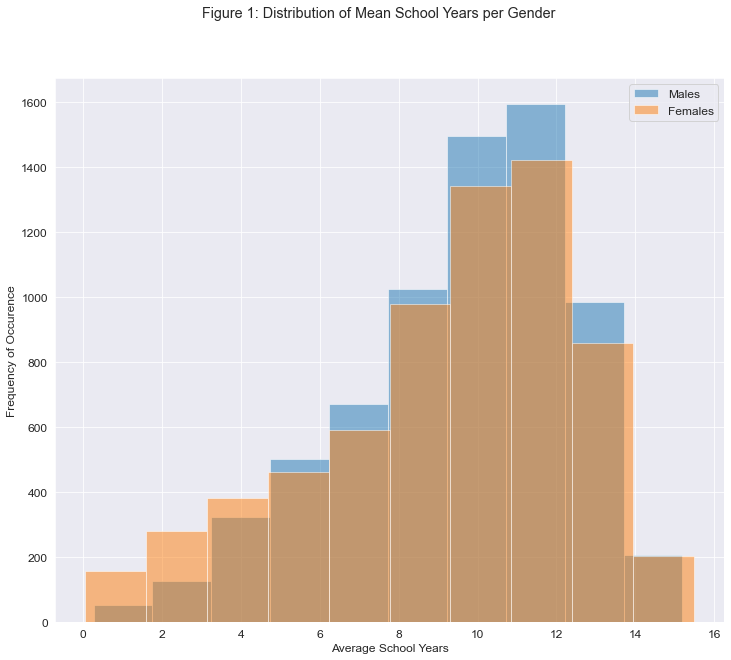

In [93]:
plt.suptitle("Figure 1: Distribution of Mean School Years per Gender")

plt.hist(df_q1_a_m['mean_school_years'], alpha=0.5, label='Males')
plt.hist(df_q1_a_f['mean_school_years'], alpha=0.5, label='Females')
plt.xlabel("Average School Years")
plt.ylabel("Frequency of Occurence")
plt.legend(loc='upper right')
plt.show()

As observed in Figure 1, the distribution of mean school years datasets is skewed to the left for both male and female data across all regions and all time frames under study. Further exploration is conducted to further investigate this distribution for each time period. 

In [95]:
df_q1_aa=df[['gender','time_period','mean_school_years']]
df_q1_aa_m = df_q1_aa.query("gender == 'male'")
df_q1_aa_f = df_q1_aa.query("gender == 'female'")

In [127]:
def hist_plot(time_frame,a,b,ind):
    plt.subplot(a,b,ind)
    plt.hist(df_q1_aa_m.query("time_period == '{}'".format(time_frame))['mean_school_years'], alpha=0.5, label='Males')
    plt.hist(df_q1_aa_f.query("time_period == '{}'".format(time_frame))['mean_school_years'], alpha=0.5, label='Females')
    plt.xlabel("Average School Years")
    plt.ylabel("Frequency of Occurence")
    plt.title(time_frame)
    plt.legend(loc='upper left')

In [128]:
time_frame = ['1996-2000', '2001-2005', '2006-2010', '2011-2015']

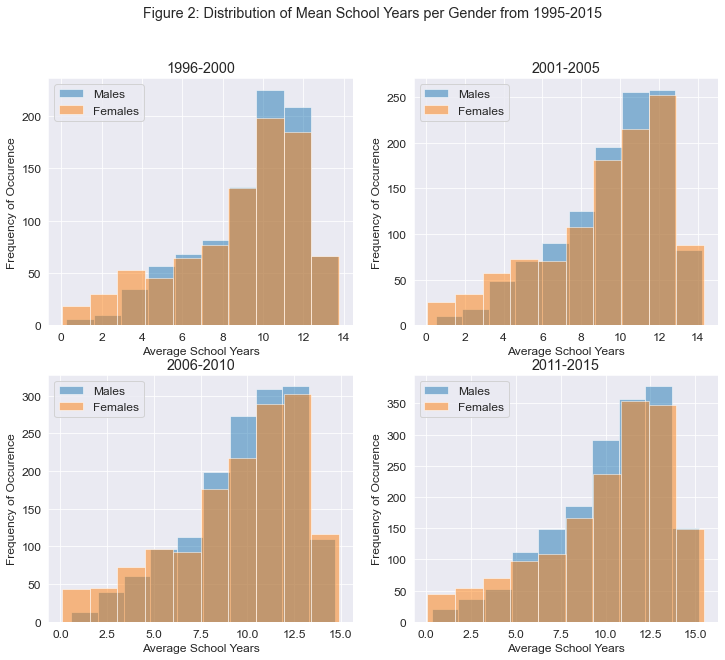

In [129]:
plt.suptitle("Figure 2: Distribution of Mean School Years per Gender from 1995-2015")

for i in range(len(time_frame)):
    hist_plot(time_frame[i],2,2,i+1)

plt.show()

Figure 2 compares histograms of mean school data for males and females in 5-year timeframes between 1995 and 2015. It is observed that the left skewing of data is observed in each subset (time frame) and the number of females receiving lower years of school education is higher than the corresponding number of males across the entire time period (which agrees with the results in Figure 1). Furthermore, it is observed that the mean years spent at school for both genders are generally higher for the time period between 2001-2015.

Since the trend across all timeframes is almost similar, the mean school years data for the two genders is analyzed according to the region to enable further exploration. This takes place as follows:

In [132]:
# Create a sub-Dataframe that calculates the mean school years per region for all the data across all time periods
df_q1 = df.groupby(['region','gender'],as_index=False)['mean_school_years'].mean()

In [133]:
df_q1_male = df_q1.query('gender == "male"')
df_q1_female = df_q1.query('gender == "female"')

In [135]:
Regions = list(df_q1['region'].unique())
Regions

['america',
 'east_asia_pacific',
 'europe_central_asia',
 'middle_east_north_africa',
 'south_asia',
 'sub_saharan_africa']

In [136]:
Regions = list(df_q1['region'].unique())
Reg = []
for i in range(len(Regions)):
    Reg.append(Regions[i].replace("_"," ").title())

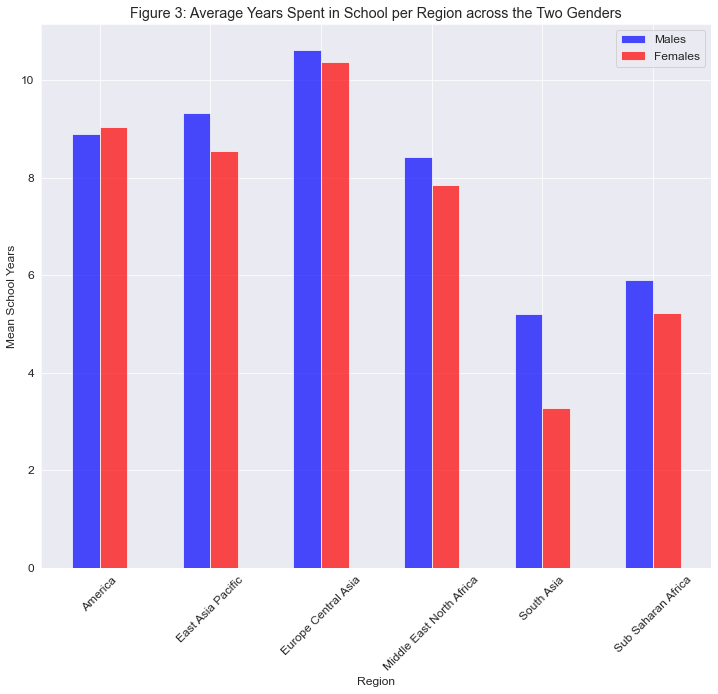

In [137]:
ind = np.arange(6)  # the x locations for the 6 regions
width = 0.25       # the width of the bars
# plot bars
bars_male = plt.bar(ind, df_q1_male['mean_school_years'], width, color='b', alpha=.7, label='Males')
bars_female = plt.bar(ind + width, df_q1_female['mean_school_years'], width, color='r', alpha=.7, label='Females')

# title and labels
plt.ylabel('Mean School Years')
plt.xlabel('Region')
plt.title('Figure 3: Average Years Spent in School per Region across the Two Genders')
locations = ind + width/2 # xtick locations
labels = Reg  # xtick labels
plt.xticks(locations, labels, rotation=45)

# legend
plt.legend()

By plotting the statistical average of mean years spent at school for males and females in different regions (in Figure 3), it is observed that females tend to spend lower years in school compared to males in all regions of the world except for America in which females spend slightly higher average number of years years at school than males.

### Research Question 2:
### What is the relationship between age and unemployment rates in different regions?

In [170]:
# Create a sub-Dataframe that calculates the employment percentages per region for different age groups across all time periods
df_q2 = df.groupby(['region','age_group'],as_index=False)['unemployment_percent'].mean()
df_q2.head(2)

,region,age_group,unemployment_percent
0,america,15-24,17.255784
1,america,25-54,6.377630


In [139]:
def pie_plot(region, a, b, ind):
    plt.subplot(a,b,ind)
    p1 = df_q2.query('region == "{}"'.format(region))['unemployment_percent']
    plt.pie(p1,autopct=lambda p : '{:,.2f}%'.format(p * sum(p1)/100))
    plt.title(region.replace("_"," ").title())
    plt.legend(df_q2['age_group'],loc="upper right")


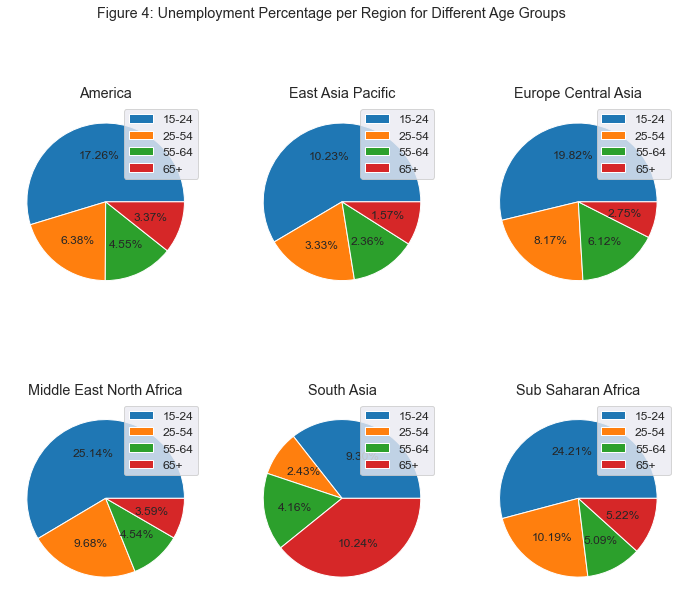

In [140]:
plt.suptitle("Figure 4: Unemployment Percentage per Region for Different Age Groups")

for i in range(len(Regions)):
    pie_plot(Regions[i],2,3,i+1)
    
plt.show()

As observed in Figure 4, the unemployment percentages are highest for people aged 15-24 for all 6 regions except South Asia. In South Asia, the highest unemployment percentage is for people aged 65 and above.

In fact, for the working age (between 15-54), the unemployment percentages are observed to be lowest in South Asia, while being highest in the Middle East North Africa Region and Sub Saharan Africa.

For people aged 55-64, the unemployment percentages are observed to be almost similar in America, Middle East North Africa, South Asia and Sub Saharan Africa (around 4-5%), whie being highest in Europe/Central Asia (\~6%) and lowest in East Asia Pacific (\~2%).

### Research Question 3:
### What is the relationship between the mean years spent at school and unemployment rates across different regions for people in the working age (15-54)?

In [143]:
df_q3=df[['region','time_period','age_group','mean_school_years','unemployment_percent']]
df_q3_aa = df_q3.query("age_group == '25-54' or age_group == '15-24'")
df_q3_a = df_q3_aa.query("time_period != 'Up to 1995'")
df_q3_a['time_period'].value_counts()

2011-2015    1896
2006-2010    1664
2001-2005    1288
1996-2000    1000
Name: time_period, dtype: int64

In [155]:
def scatter_plot_q3(region, a, b, ind):
    plt.subplot(a,b,ind)
    df_q3_1 = df_q3_a.query('region == "{}"'.format(region))
    plt.scatter(df_q3_1['mean_school_years'],df_q3_1['unemployment_percent'])
    plt.xlabel("Mean School Years")
    plt.ylabel("Unemployment Percentage")
    plt.title(region.replace("_"," ").title())

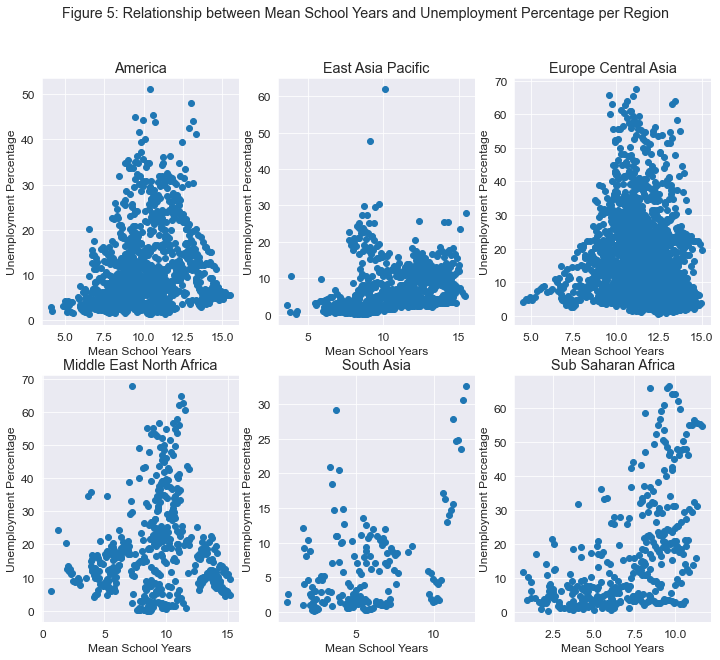

In [156]:
plt.suptitle("Figure 5: Relationship between Mean School Years and Unemployment Percentage per Region")

for i in range(len(Regions)):
    scatter_plot_q3(Regions[i],2,3,i+1)
    
plt.show()

As observed in Figure 5, the data points are widely dispersed and the correlation is generally weak between Mean School Years and Unemployment Percentages. Nevertheless, a negative correlation is observed between Mean School Years and Unemployment Percentage in America, East Asia Pacific, Europe/Central Asia and MENA Region, after a certain threshold of mean school years =\~12 years. 

### Research Question 4:
### How have unemployment rates varied over time in countries from different regions? Are unemployment rates growing in certain regions than others? 

Text(0.5, 1.0, 'Figure 6: Mean Unemployment Percentage over Years')

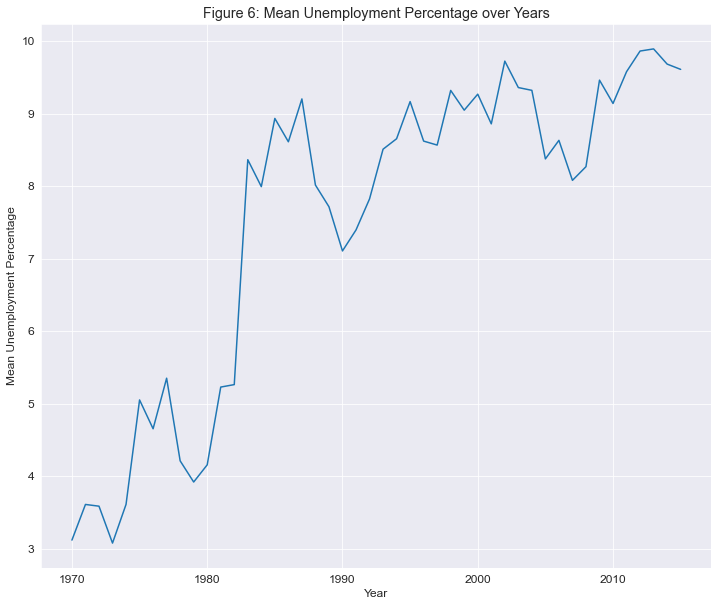

In [146]:
# First, investigate the trend in global unemployment rates over time. 
plt.plot(df.groupby('year')['unemployment_percent'].mean())
plt.xlabel('Year')
plt.ylabel('Mean Unemployment Percentage')
plt.title("Figure 6: Mean Unemployment Percentage over Years")

The line plot in Figure 6 shows that a steep increase in the mean percentage unemployment over time for the period between 1970 to around 1985. The percentage unemployment increased from slightly above 3% to around 9%. After 1985, the percentage unemployment decreases to around 7% until 1990 then increases again to 9% by 1995. From 1995 to 2015, the percentage unemployment fluctuates between 8-10% from around 1992 to 2015.

In [147]:
# Create a sub-Dataframe that calculates the average unemployment percentage per region for each timeperiod
df_region = df.groupby(['time_period','region'],as_index=False)['unemployment_percent'].mean()

In [148]:
# Split into sub-dataframes per time frame. 
df_bef_1995 = df_region.query('time_period == "Up to 1995"')
df_1995_2000 = df_region.query('time_period == "1996-2000"')
df_2001_2005 = df_region.query('time_period == "2001-2005"')
df_2006_2010 = df_region.query('time_period == "2006-2010"')
df_2011_2015 = df_region.query('time_period == "2011-2015"')

In [149]:
#verify shape
df_bef_1995.shape == df_1995_2000.shape == df_2001_2005.shape == df_2006_2010.shape == df_2011_2015.shape

True

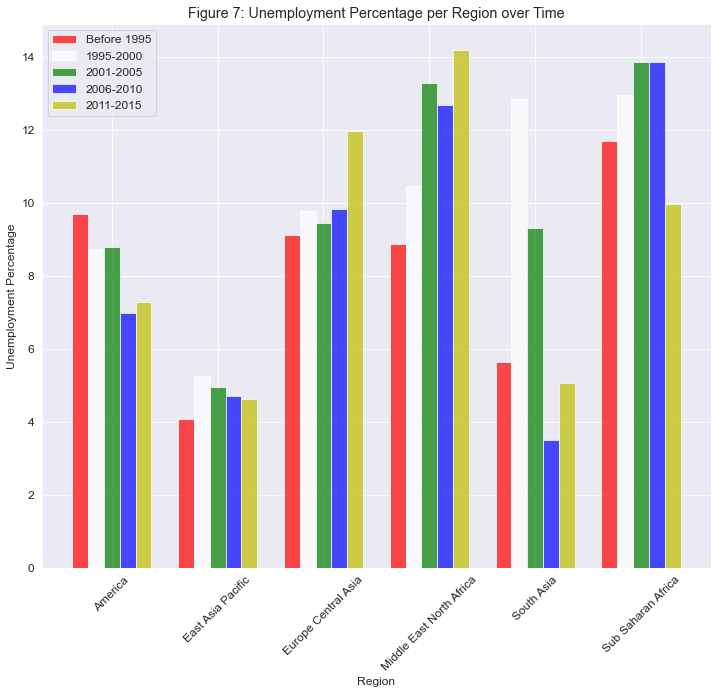

In [150]:
ind = np.arange(6)  # the x locations for the 6 regions
width = 0.15       # the width of the bars
# plot bars
bars_bef_1995 = plt.bar(ind, df_bef_1995['unemployment_percent'], width, color='r', alpha=.7, label='Before 1995')
bars_1995_2000 = plt.bar(ind + width, df_1995_2000['unemployment_percent'], width, color='w', alpha=.7, label='1995-2000')
bars_2001_2005 = plt.bar(ind + 2*width, df_2001_2005['unemployment_percent'], width, color='g', alpha=.7, label='2001-2005')
bars_2006_2010 = plt.bar(ind + 3*width, df_2006_2010['unemployment_percent'], width, color='b', alpha=.7, label='2006-2010')
bars_2011_2015 = plt.bar(ind + 4*width, df_2011_2015['unemployment_percent'], width, color='y', alpha=.7, label='2011-2015')

# title and labels
plt.ylabel('Unemployment Percentage')
plt.xlabel('Region')
plt.title('Figure 7: Unemployment Percentage per Region over Time')
locations = ind + 2*width # xtick locations
labels = Reg  # xtick labels
plt.xticks(locations, labels, rotation=45)

# legend
plt.legend()

As observed in Figure 7, the unemployment percentage has decreased over time in America until 2010, then slightly increased from 2011-2015.
In Europe-Central Asia and Middle East/North Africa, the unemployment percentage has generally increased over time. Furthermore, while the unemployment percentage is almost stable in East Asia Pacific, it is observed to surge between 1995-2005 in South Asia and between 2001-2010 in Sub Saharan Africa.

#### Research Question 5:

#### What is the relationship between mean school years and youth literacy rates per region?

In [151]:
df_q5=df[['region','time_period','age_group','mean_school_years','youth_literacy_rate']]
df_q5_a = df_q5.query("age_group == '15-24'")
df_q5_a = df_q5_a.dropna()

In [152]:
df_q5_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 2 to 8599
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               2098 non-null   object 
 1   time_period          2098 non-null   object 
 2   age_group            2098 non-null   object 
 3   mean_school_years    2098 non-null   float64
 4   youth_literacy_rate  2098 non-null   float64
dtypes: float64(2), object(3)
memory usage: 98.3+ KB


In [157]:
def scatter_plot_q5(region, a, b, ind):
    plt.subplot(a,b,ind)
    df_q5_1 = df_q5_a.query('region == "{}"'.format(region))
    plt.scatter(df_q5_1['mean_school_years'],df_q5_1['youth_literacy_rate'])
    plt.xlabel("Mean School Years")
    plt.ylabel("Youth Literacy Rate")
    plt.title(region.replace("_"," ").title())

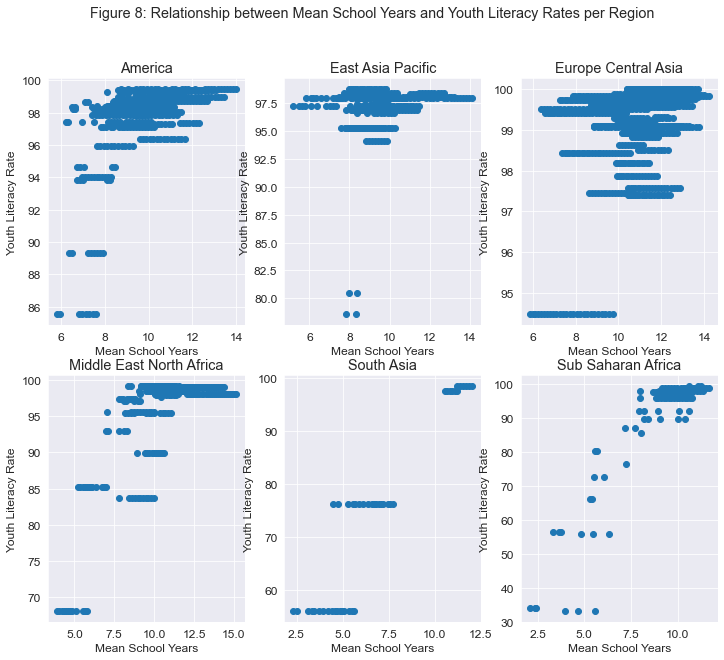

In [158]:
plt.suptitle("Figure 8: Relationship between Mean School Years and Youth Literacy Rates per Region")

for i in range(len(Regions)):
    scatter_plot_q5(Regions[i],2,3,i+1)
    
plt.show()

As observed in Figure 8, higher youth literacy rates are generally correlated with higher mean years spent at school across all time periods for all regions, although the number of data points for Middle East North Africa, South Asia and Sub Saharan Africa Regions is much lower than the data points available for the other three regions. 

<a id='conclusions'></a>
## Conclusions
Based on the conducted data analysis and exploration, the following conclusions can be drawn:

### RQ 1:
1. The distribution of mean school years datasets are similar for both male and female data, and are skewed to the left. This means that the mean school years are relatively high across the entire dataset. 
2. The mean years spent at school for both genders are generally higher for the time period between 2001-2015.
3. Based on the reported data, females tend to spend less years at school compared to males, across all time periods and in different regions of the world, except for America in which females spend slightly higher years at school than males.

### RQ2: 
1. Except for South Asia, the unemployment percentages are highest for people aged 15-24 for all other regions. In South Asia, the highest unemployment percentage is for people aged 65 and above. 
2. For the working age (between 15-54), the unemployment percentages are lowest in South Asia and highest in the MENA Region and Sub Saharan Africa.
3. For people aged 55-64, the unemployment percentages are almost similar in America MENA region, South Asia and Sub Saharan Africa (around 4-5%), whie being highest in Europe/Central Asia (\~6%) and lowest in East Asia Pacific (\~2%). 

### RQ3:
1. Despite the dispersity of the data points and the weak correlation observed in almost all the scatter plots, a negative correlation is observed between Mean School Years and Unemployment Percentage in America, East Asia Pacific, Europe/Central Asia and MENA Region, after a certain threshold of mean school years =\~12 years. 

This, however, should acknowledge the difference in the numbers of datapoints from each region. Furthermore, due to the difference in the numbers of data points in the unemployment and mean school years datasets, the merging caused loss in data points which can be the reason of this disperse scatter plots. 

Additional data to fill in the gaps between the two datasets can help draw better conclusions on this correlation. 

### RQ4:
1. The mean percentage unemployment steeply increased over time for the period between 1970 to around 1985 from slightly above 3% to around 9%. The rate of change then decreases and percentage unemployment fluctuates between 8-10% from around 1992 to 2015.
2. The unemployment percentage has decreased over time in America up to 2010 but is slightly increased from 2011-2015. 
3. The unemployment percentage has increased over time in Europe-Central Asia and Middle East/North Africa.
4. It is almost stable in East Asia Pacific and is highest between 1995-2005 in South Asia and Sub Saharan Africa. 

### RQ5:
1. Higher youth literacy rates are generally correlated with higher mean years spent at school across all time periods. 
2. More data points on youth literacy rates for Middle East North Africa, South Asia and Sub Saharan Africa regions are needed to draw more reliable conclusions.

*** 

### Limitations
1. The number of datapoints reported in the original DDFcsv files for unemployment rates are different from those for the mean school years, although the same categories of country, age group and gender are used in both files. In particular, the total number of data points for unemployment data is 16120, spanning a time frame from 1948 to 2017, while the number of data points for mean school years is 69184, spanning a time frame from 1992 to 2015. While the intersection (i.e. inner join) between these two dataset was necessary to perform a fair comparison of the relationship between the different factors, this intersection causes loss of a large number of data points from the mean school years data, while cutting down the time frame of the unemploymeent data to match that of the mean school years data. This is a key limitation of the presented exploration, and can be acknowledged by studying each criteria (i.e. unemployment percentage and mean school years) in isolation then interpolating/extrapolating the results accordingly to perform the required comparisons. 

2. In the conducted analysis, age is grouped according to the grouping in the unemployment percentage files, which has larger bins compared to the mean school years data which is provided for every 10 years of age. This is particularly evident for the age group 25-54 years. The merging of school years data into the wider age groups of the unemployment data is expected to have an impact on the outcomes of the data exploration stage. However, this impact has been minimized by taking the statistical average of the mean school years values in 25-34, 35-44 and 45-54 to generate the wider grouping from 25-54. 

3. Data on youth literacy rates is available until 2011 only, and does not follow the same resolution as the mean school years data. This is partially overcome by filling the nulls within the youth age group (15-24) with the mean across the different years. This, however, impacts the reliability of the conclusions made based on this data and affects the correlation between these two variables.
